In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('/content/shopping_trends.csv')

In [3]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
data.shape

(3900, 19)

In [5]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


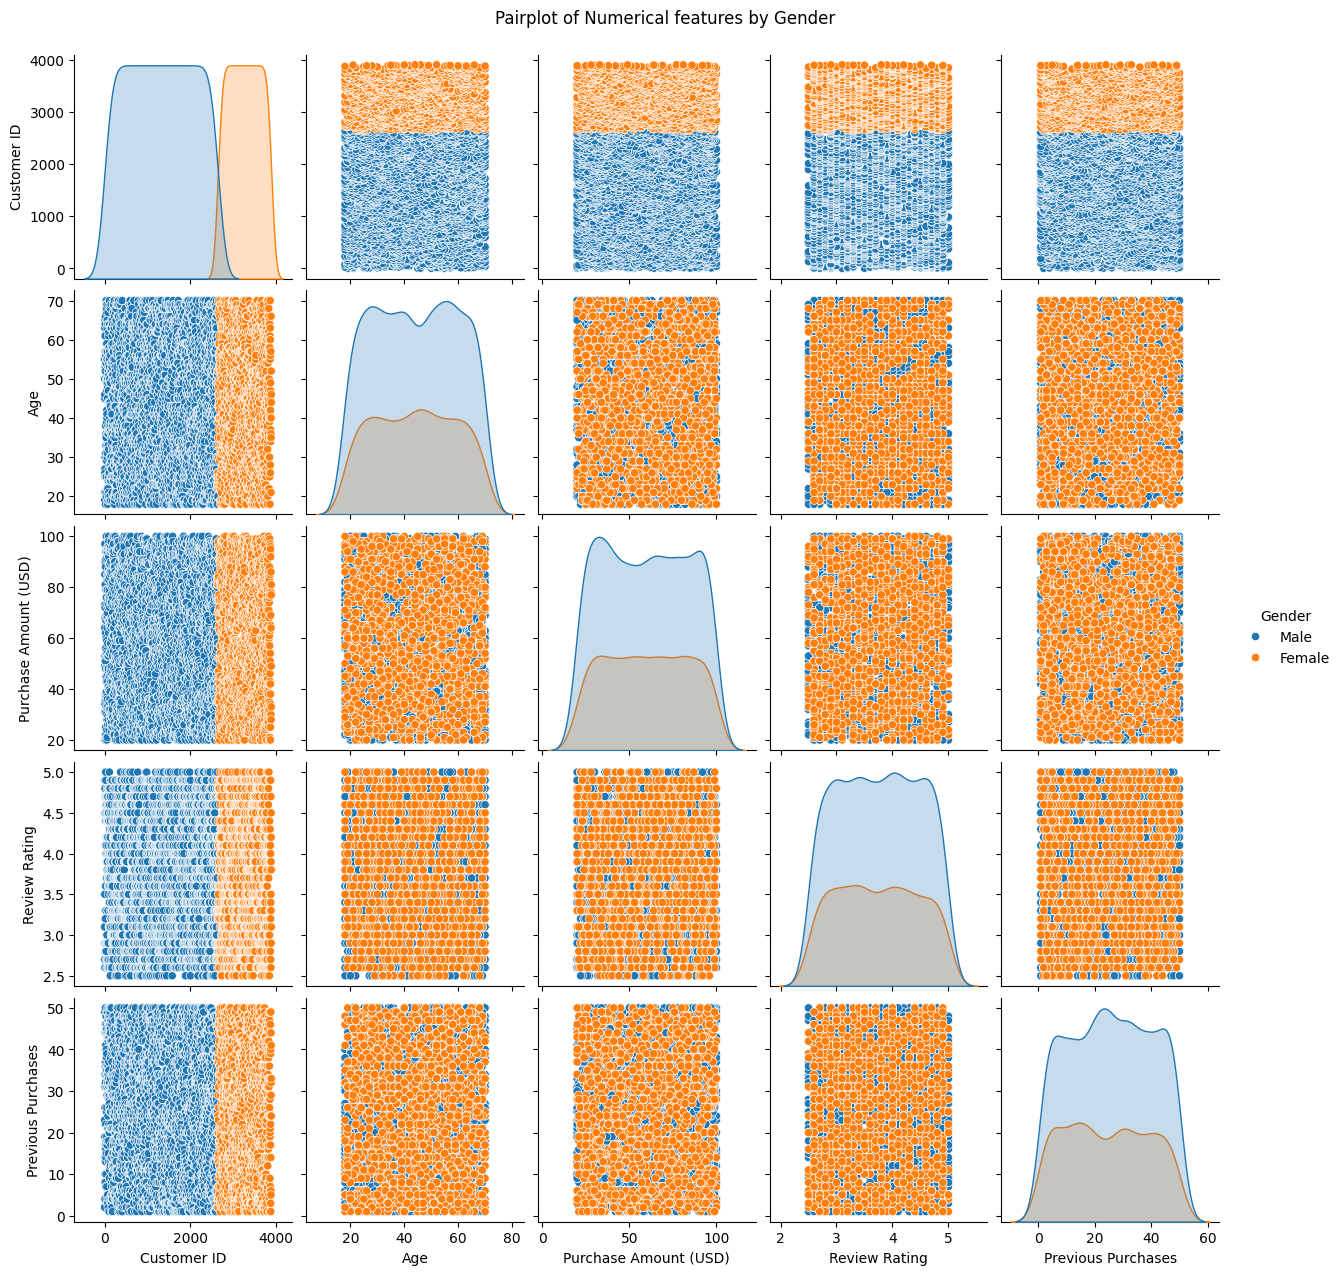

In [9]:
sns.pairplot(data,hue='Gender')
plt.suptitle('Pairplot of Numerical features by Gender',y=1.02)
plt.show()

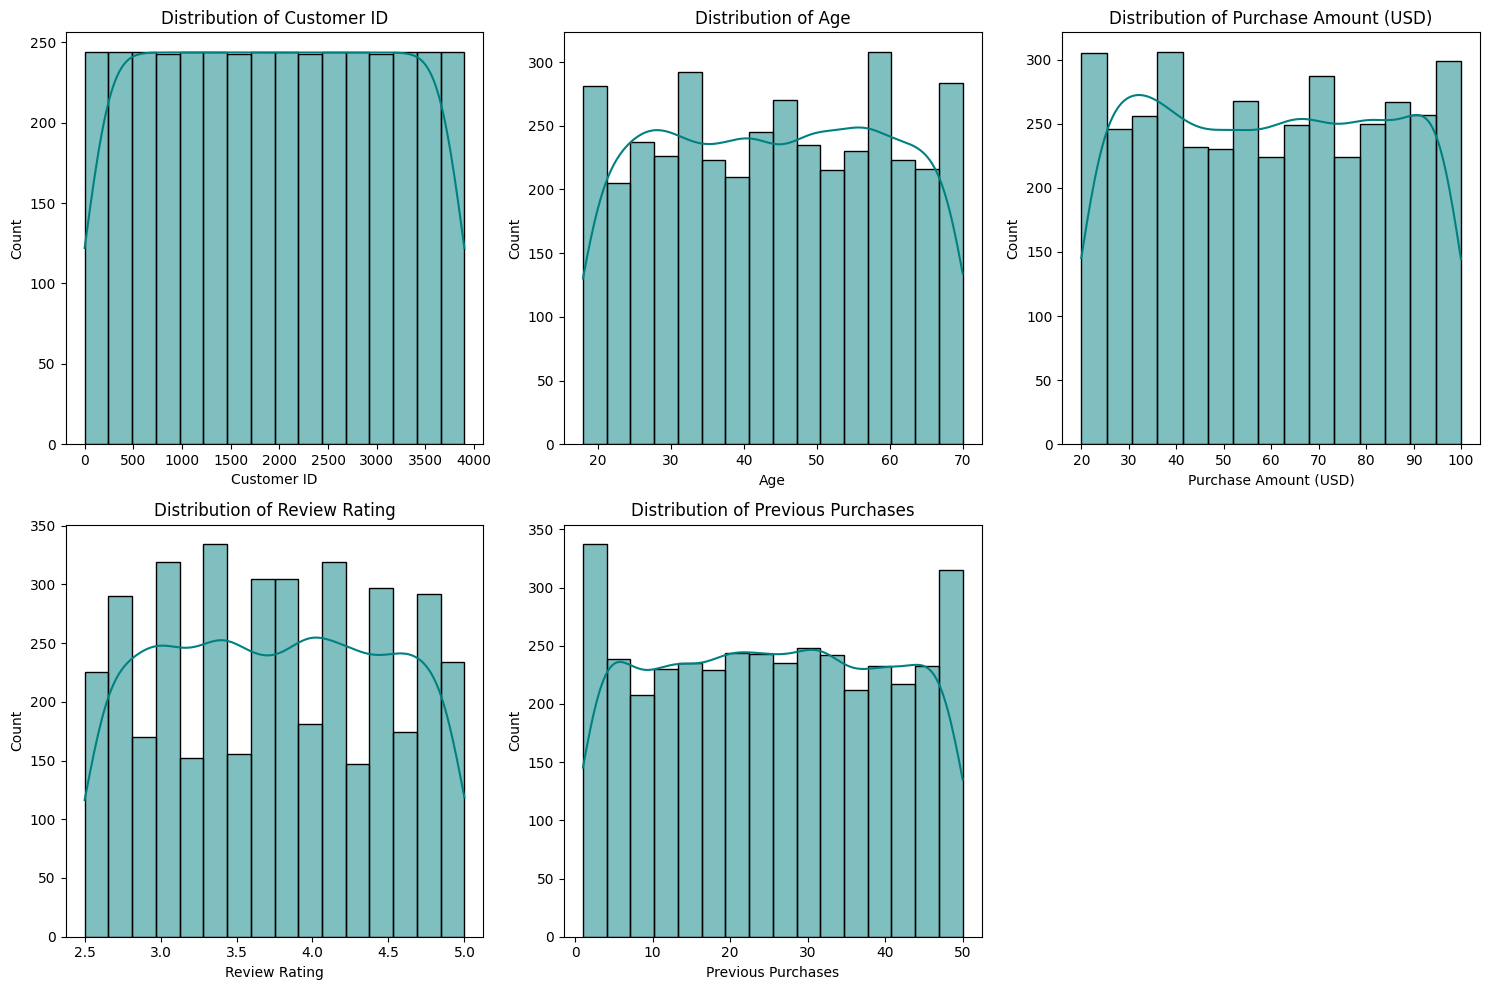

In [12]:
plt.figure(figsize = (15, 10))
numeric_cols = data.select_dtypes(include = 'number').columns

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde = True, color = 'teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


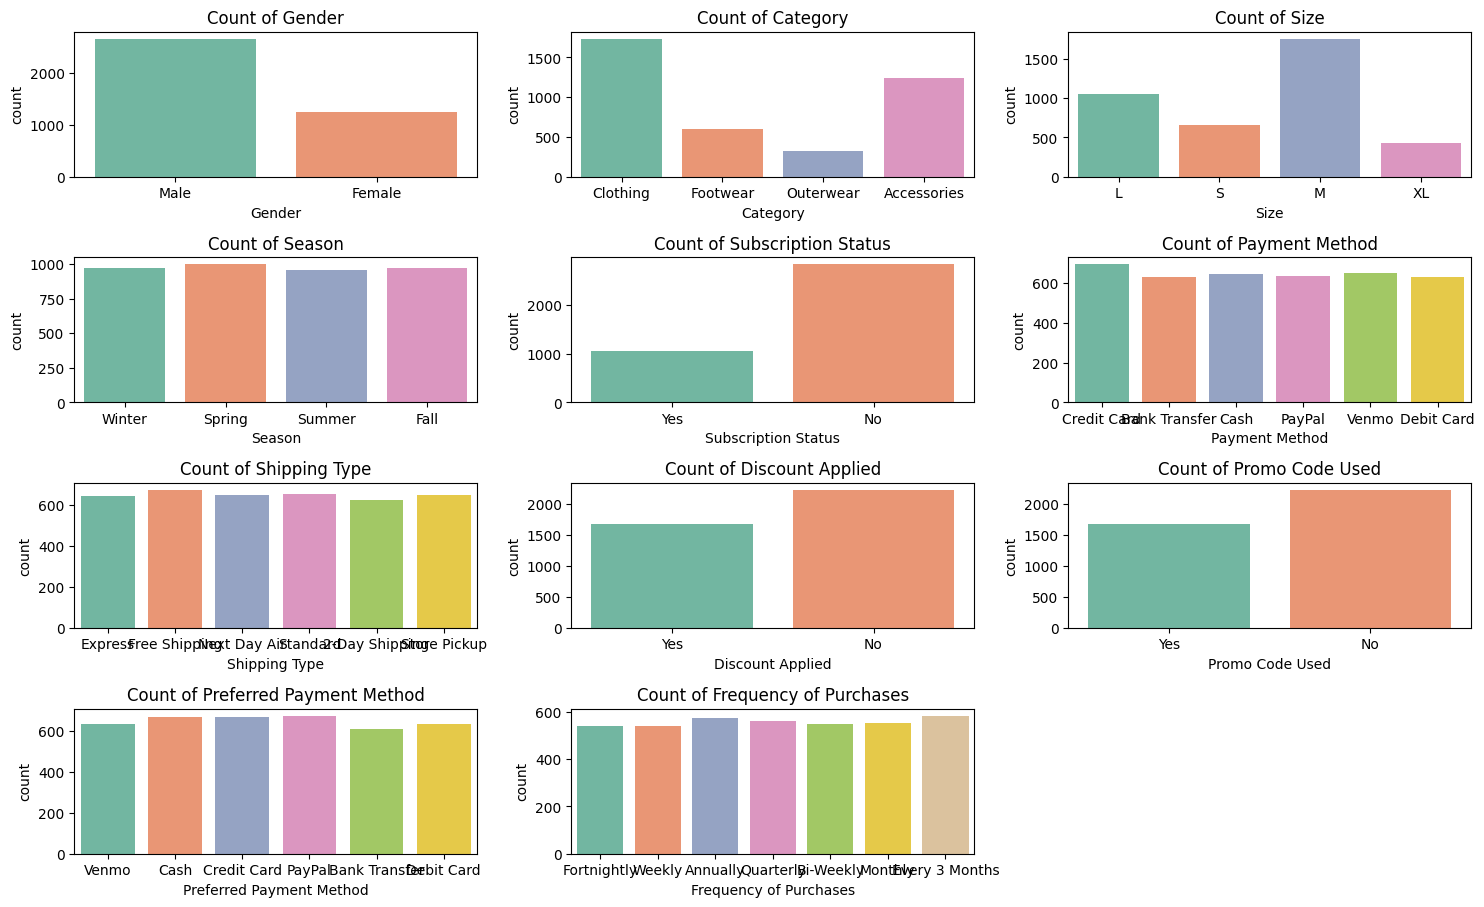

In [13]:
plt.figure(figsize = (15, 11))
categorical_cols = ['Gender','Category','Size','Season','Subscription Status','Payment Method','Shipping Type','Discount Applied','Promo Code Used', 'Preferred Payment Method','Frequency of Purchases']

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i + 1)
    sns.countplot(data = data, x = col, palette = "Set2")
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

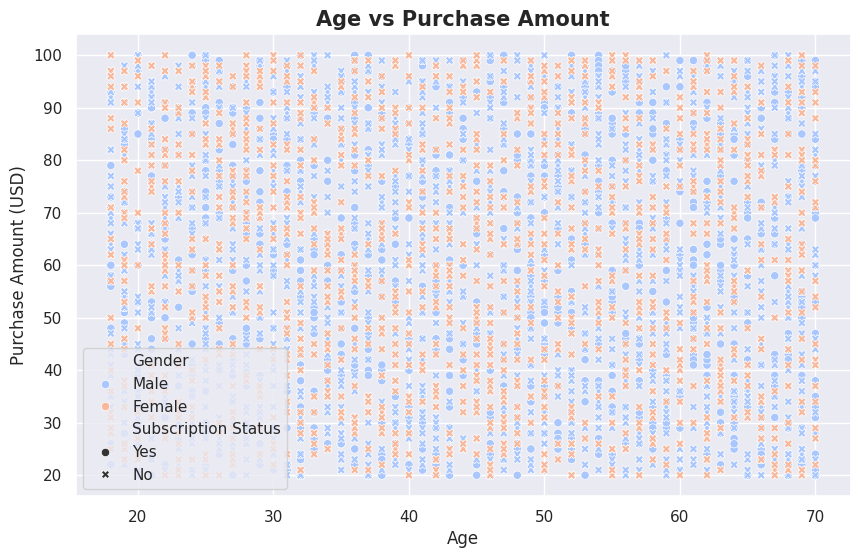

In [14]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.scatterplot(data = data, x = 'Age',
                y = 'Purchase Amount (USD)',
                hue = 'Gender',
                style = 'Subscription Status',
                palette = 'coolwarm')
plt.title('Age vs Purchase Amount', fontweight = 'bold', fontsize = 15)
plt.show()

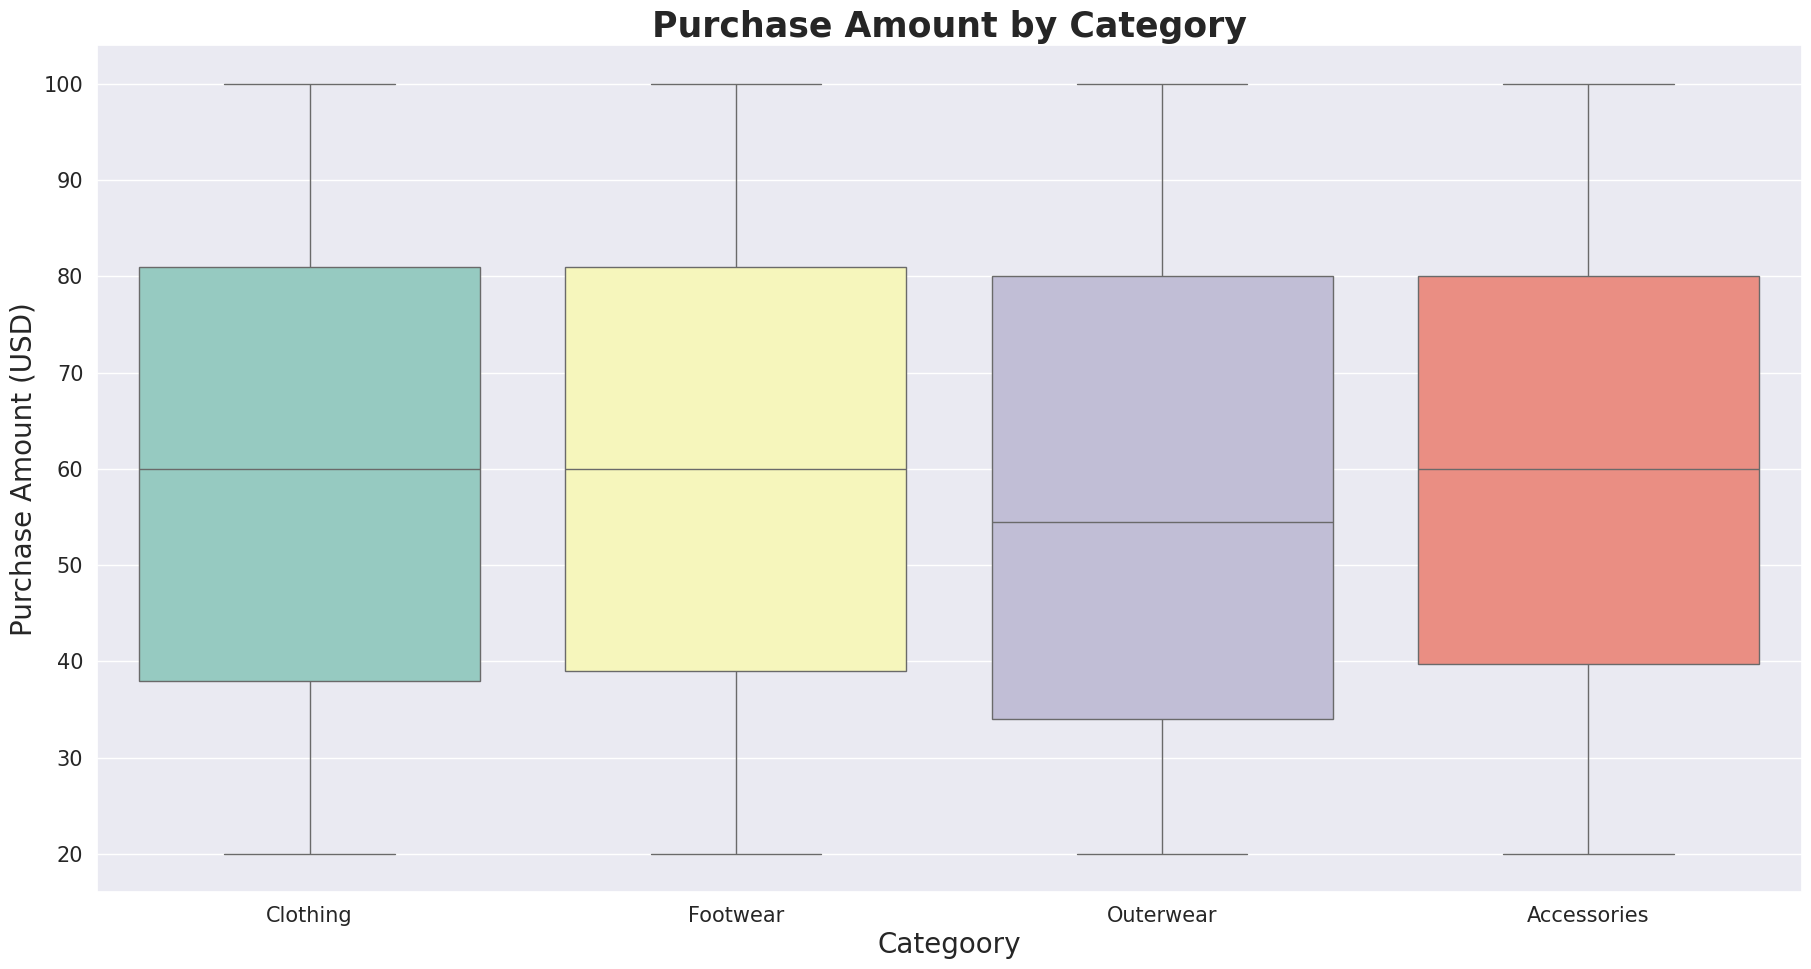

In [15]:
sns.set(rc = {'figure.figsize':(22,11)})
sns.boxplot(data = data, x = 'Category',
            y = 'Purchase Amount (USD)',
            palette = 'Set3')
plt.title('Purchase Amount by Category', fontweight = 'bold', fontsize = 25)
plt.xlabel('Categoory', fontsize = 20)
plt.ylabel('Purchase Amount (USD)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

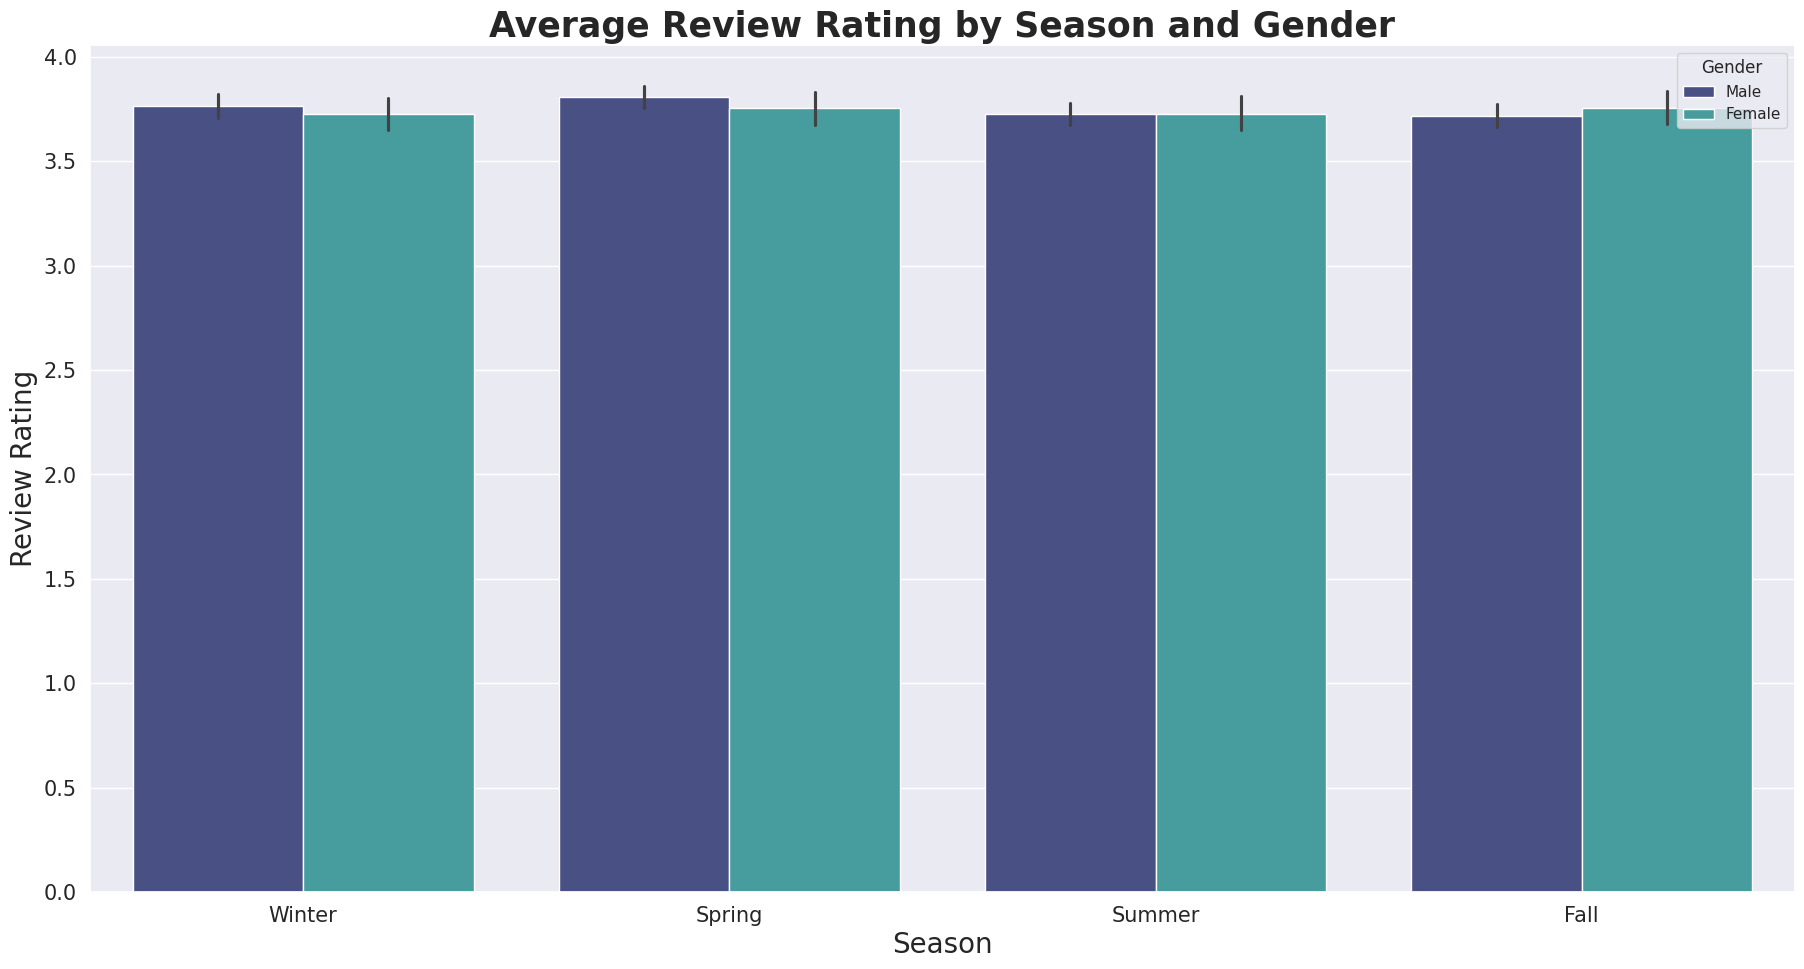

In [16]:
sns.set(rc = {'figure.figsize': (22,11)})
sns.barplot(data = data,
            x = 'Season', y = 'Review Rating',
            hue = 'Gender', palette = 'mako')
plt.title('Average Review Rating by Season and Gender',fontweight = 'bold', fontsize = 25)
plt.xlabel('Season', fontsize = 20)
plt.ylabel('Review Rating', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

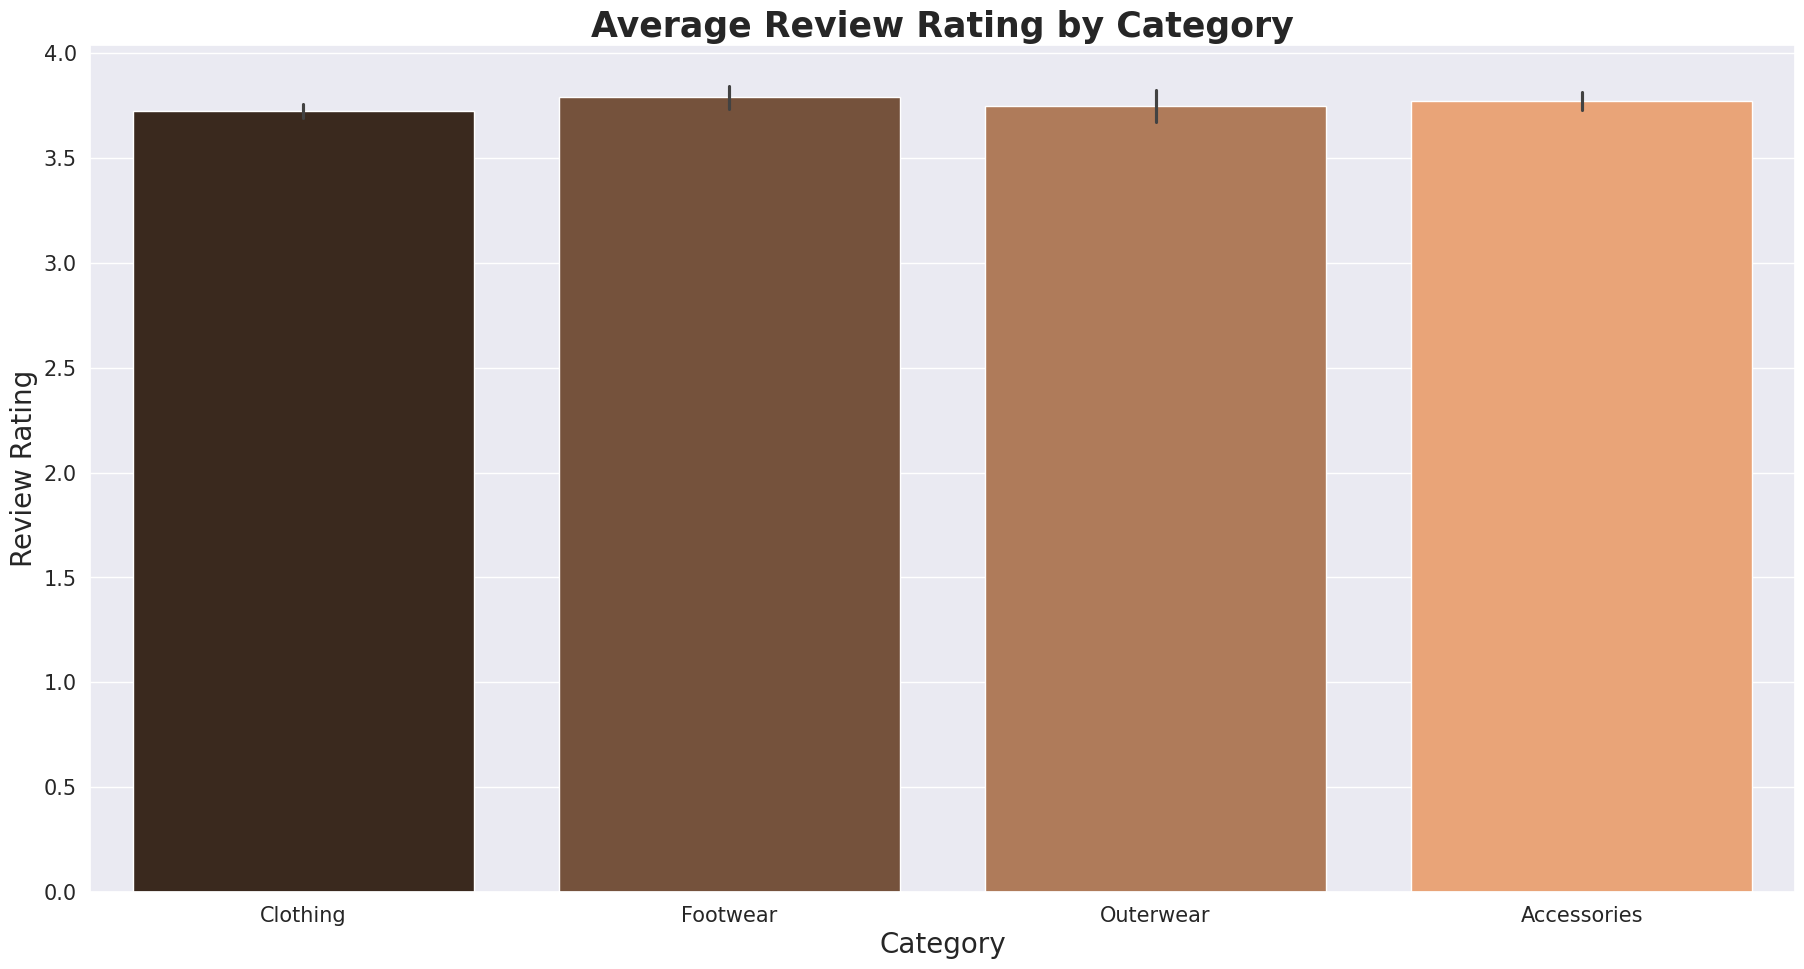

In [17]:
sns.barplot(data = data, x = 'Category',
            y = 'Review Rating', palette = 'copper')
plt.title('Average Review Rating by Category',fontweight = 'bold', fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Review Rating',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

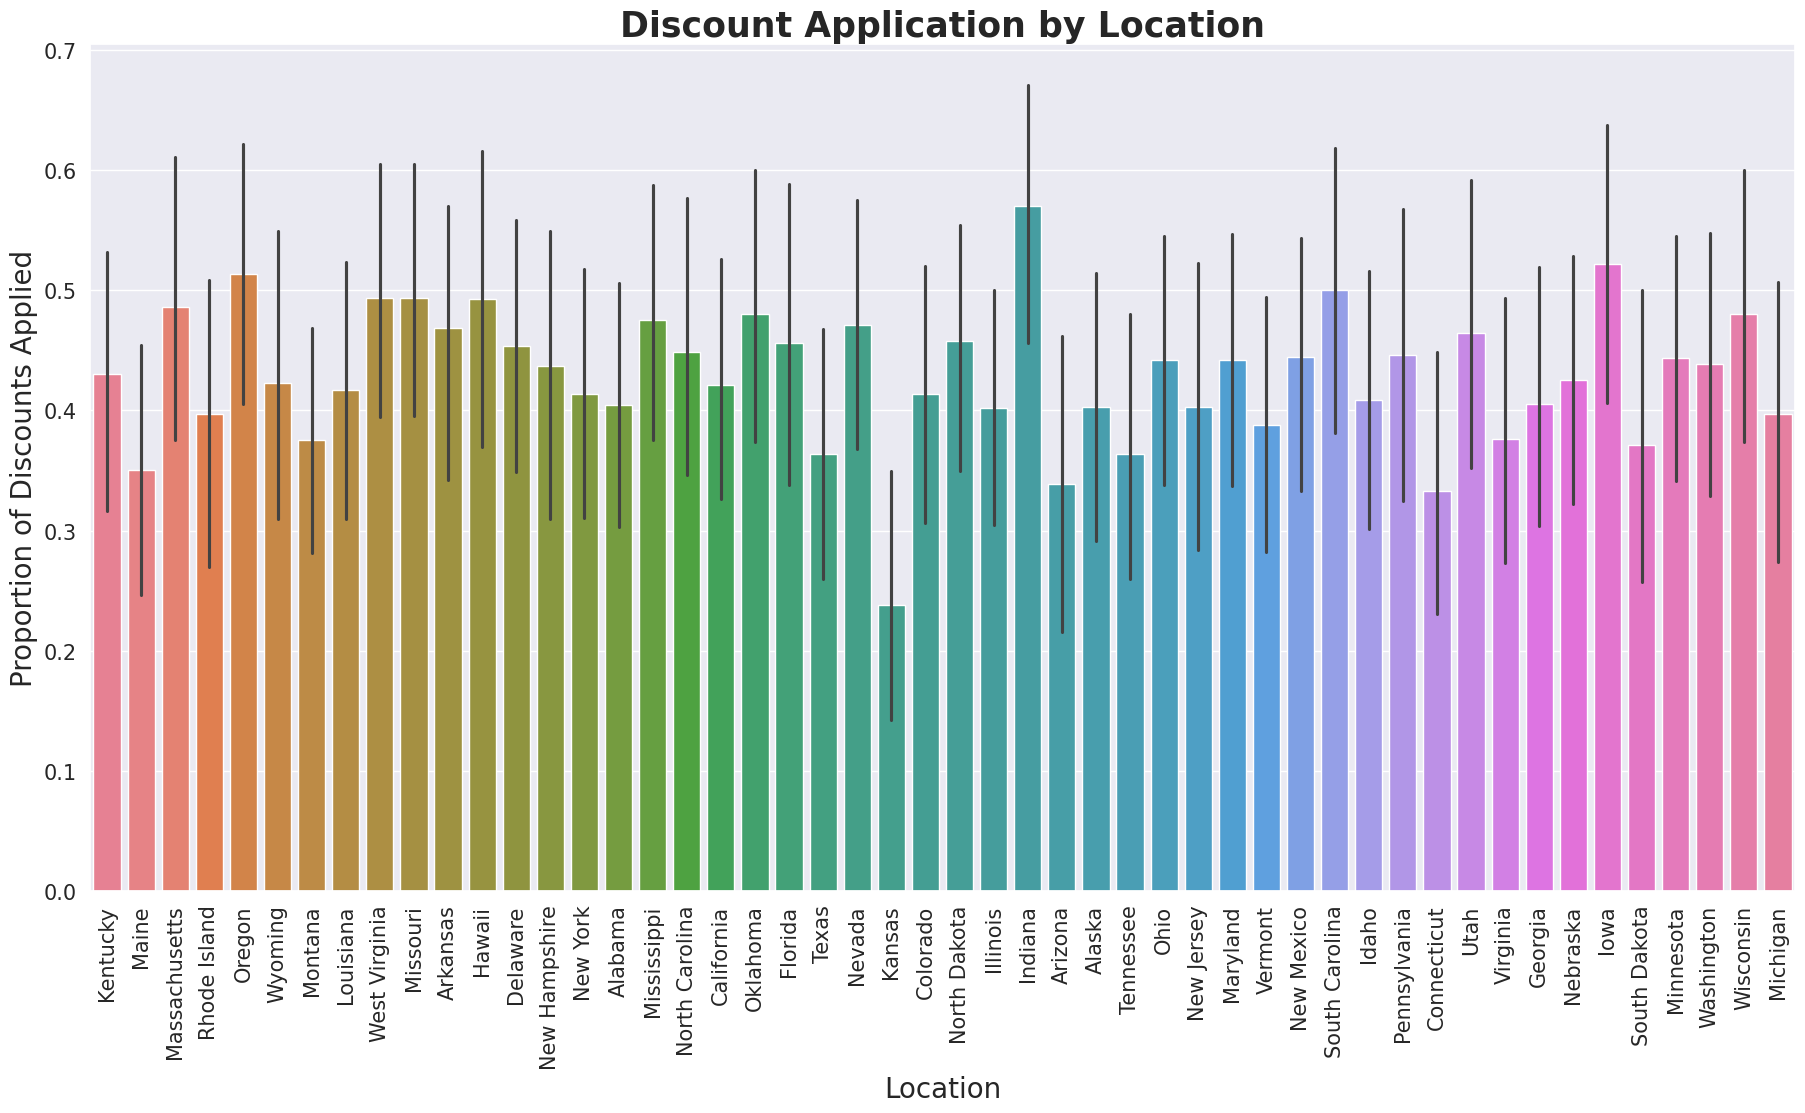

In [18]:
sns.barplot(data = data,
            x = 'Location', y = data['Discount Applied'].apply(lambda x: 1 if x == 'Yes' else 0), palette = 'husl')
plt.title('Discount Application by Location',fontweight = 'bold', fontsize = 25)
plt.xlabel('Location',fontsize = 20)
plt.ylabel('Proportion of Discounts Applied',fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

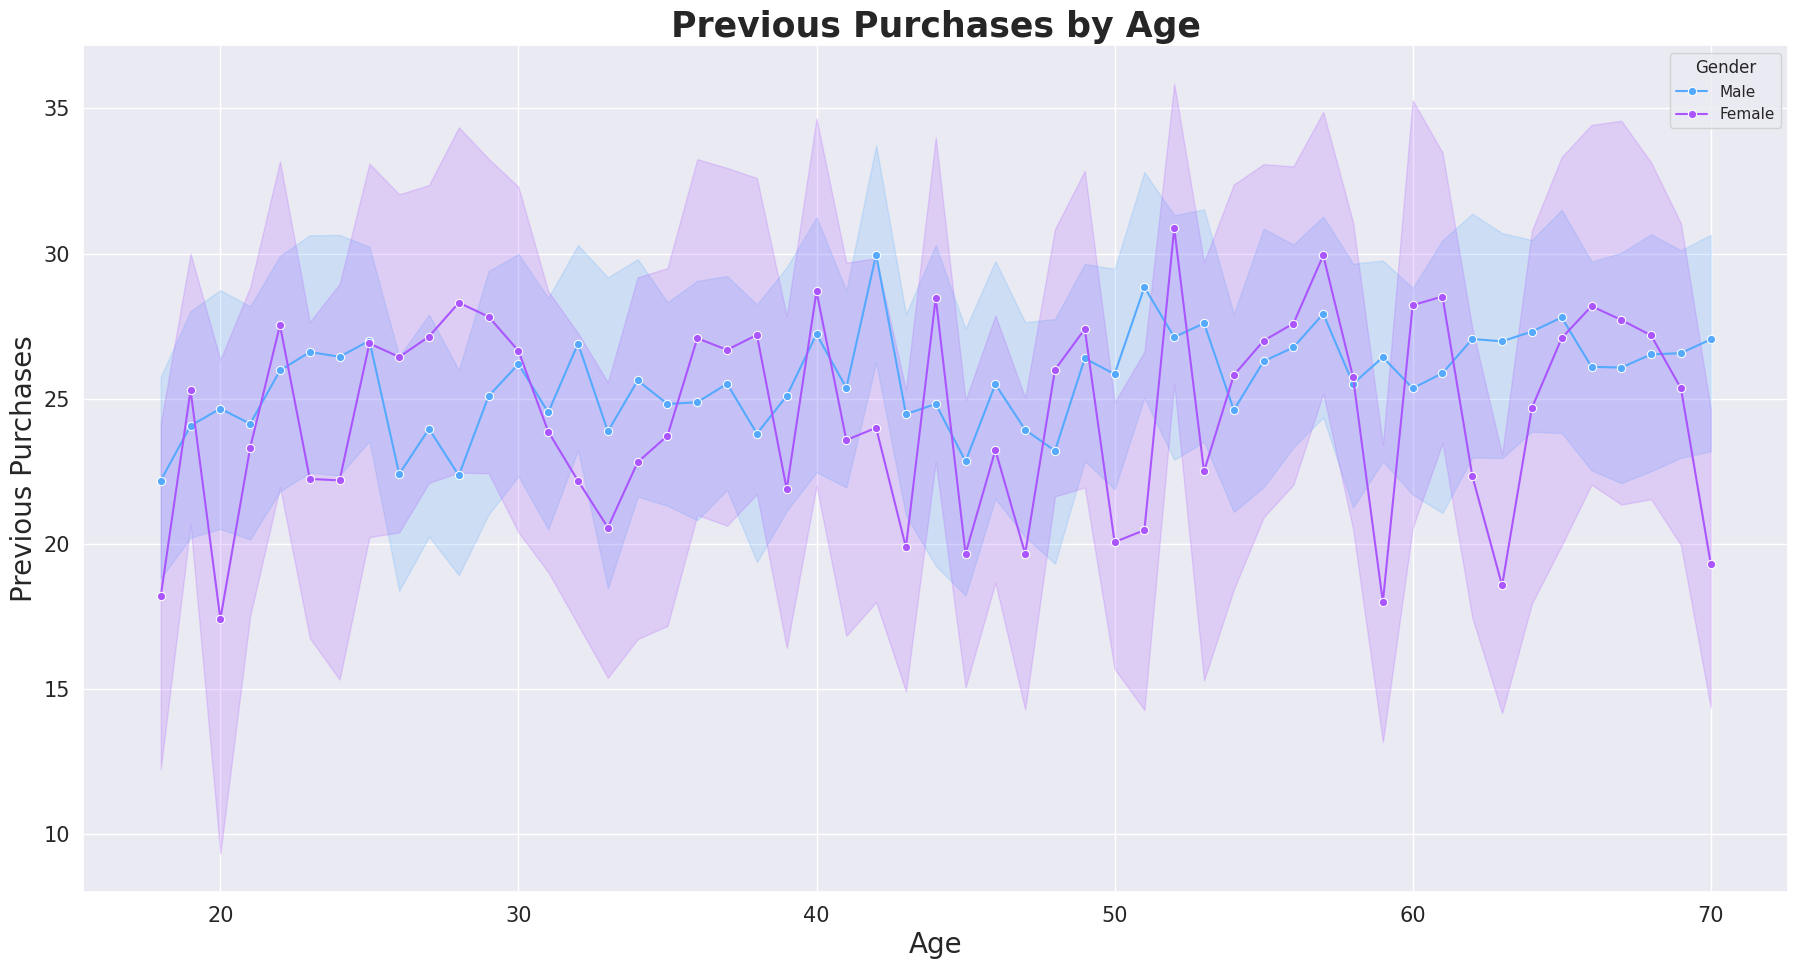

In [19]:
sns.lineplot(data = data,
             x = 'Age', y = 'Previous Purchases',
             hue = 'Gender', marker = 'o',
             palette = 'cool')
plt.title('Previous Purchases by Age',fontweight = 'bold', fontsize = 25)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Previous Purchases', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


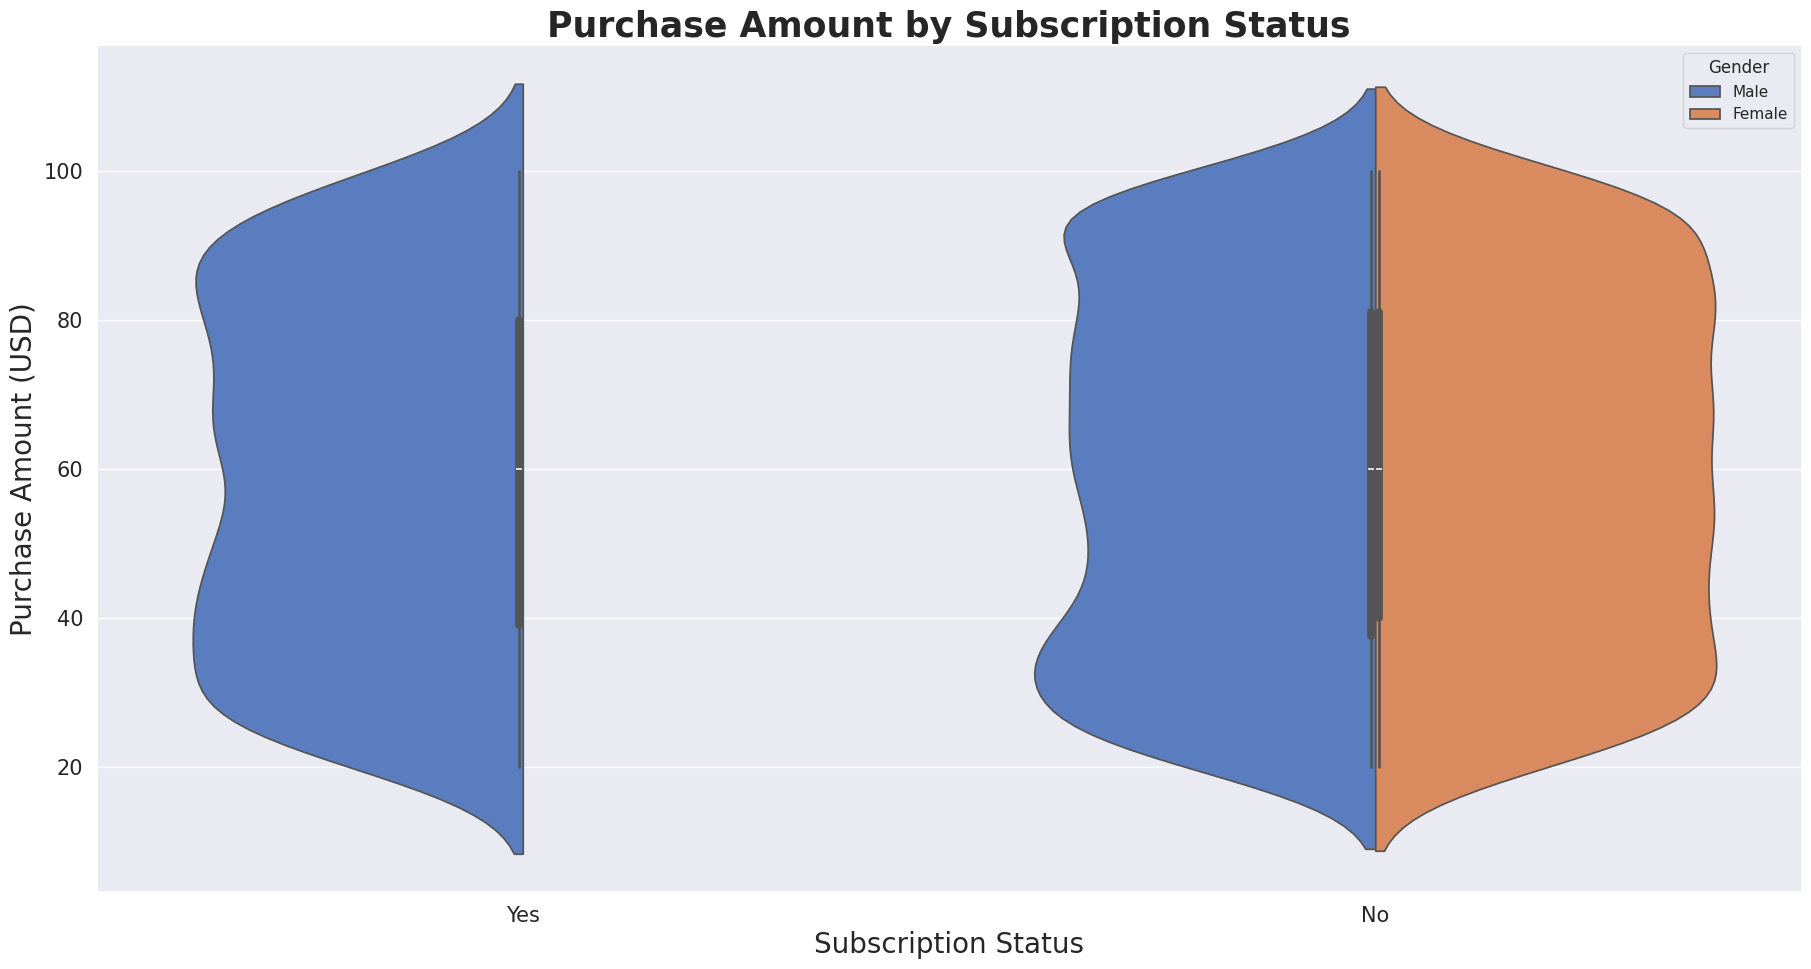

In [20]:
sns.violinplot(data = data,
               x = 'Subscription Status',
               y = 'Purchase Amount (USD)', hue = 'Gender',
               split = True, palette = 'muted')
plt.title('Purchase Amount by Subscription Status', fontweight = 'bold', fontsize = 25)
plt.xlabel('Subscription Status',fontsize = 20)
plt.ylabel('Purchase Amount (USD)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

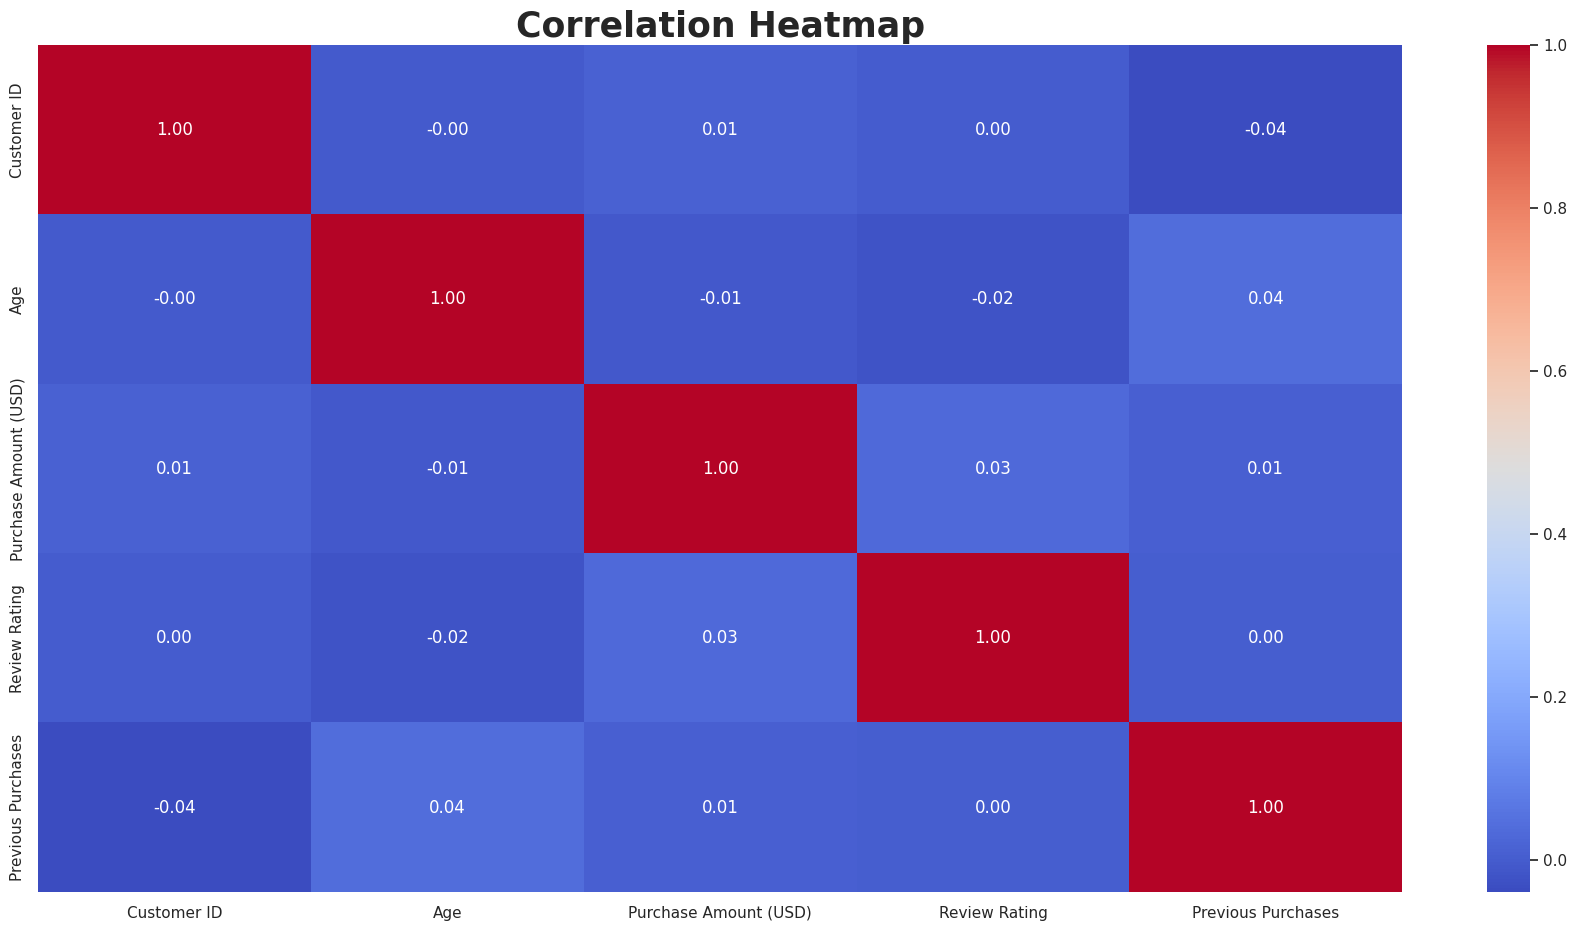

In [21]:
correlation_matrix = data.select_dtypes(include = 'number').corr()
sns.heatmap(correlation_matrix, annot = True,
            cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap',fontweight = 'bold', fontsize = 25)
plt.show()